In [1]:
import numpy as np
import scipy.stats
import sklearn.decomposition
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none' # export SVG text as text, not paths
plt.rcParams['axes.facecolor'] = 'w' # white axes background
plt.rcParams['savefig.facecolor'] = 'w' # white main background, for blog posts

# Part 2: Association tests and feature selection

## 1. Load Civ5 data as in Part 1, and new Civ5 metadata

In [7]:
df = pd.read_csv('civdata.csv', index_col=0).T # Part 1 data
print(df.shape)
df.head()

(43, 63)


,Boldness,Chattiness,Denounce Willingness,Diplomatic Balance,Friendship Willingness,Forgiveness,Loyalty,Meanness,City-State Competitiveness,Neediness,...,Friendly,Guarded,Hostile,Neutrality,War,CS Bully,CS Conquest,CS Friendly,CS Ignore,CS Protect
Ahmad al-Mansur,4,6,5,5,6,5,6,5,5,6,...,8,6,4,5,5,4,4,6,4,6
Alexander,8,7,7,3,4,5,4,7,3,4,...,5,5,7,4,6,3,4,5,4,8
Ashurbanipal,6,3,6,5,5,4,5,5,3,4,...,5,5,6,5,8,5,7,4,4,3
Askia,7,5,5,6,6,4,6,6,4,4,...,6,6,6,5,7,7,8,5,5,4
Attila,8,5,6,4,3,4,4,8,3,3,...,3,3,8,5,8,8,7,4,5,3


In [8]:
df_meta = pd.read_csv('civmetadata.csv', index_col=0)
print(df_meta.shape)
df_meta.head()

(43, 7)


,Born,Death,Age,Gender,Civilization,Continent,Region
Leader,,,,,,,
Ahmad al-Mansur,1549.0,1603.0,54.0,Male,Morrocan,Africa,Africa
Alexander,-356.0,-323.0,33.0,Male,Greek,Europe,Europe
Ashurbanipal,-685.0,-627.0,58.0,Male,Assyrian,Asia,Middle East
Askia,1442.0,1538.0,96.0,Male,Songhai,Africa,Africa
Attila,406.0,453.0,47.0,Male,Hunnic,Asia,Asia


## 2. Examine raw distributions by era, gender, and region

In [11]:
print(sorted(df_meta['Region'].unique()))

['Africa', 'Americas', 'Asia', 'Europe', 'Middle East', 'Oceania']


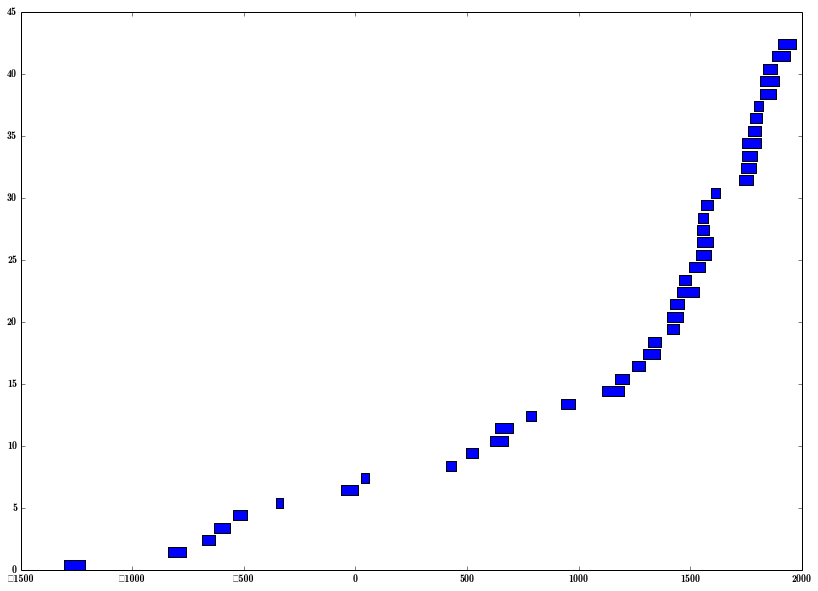

In [23]:
%matplotlib inline
regions = sorted(df_meta['Region'].unique())
df_meta_sorted = df_meta.sort_values('Born')
df_meta_sorted['Born_Rank'] = range(df_meta.shape[0])

fig, ax = plt.subplots(1,1,figsize=(14,10))
for i,region in enumerate(regions):
    df_region = df_meta_sorted[df_meta_sorted['Region'] == region]
    ax.barh(bottom=df_region['Born_Rank'].values, 
             width=df_region['Death'].values - df_region['Born'].values,
             left=df_region['Born'])

In [15]:
df_meta_sorted = df_meta.sort_values('Born')
df_meta_sorted.head()

,Born,Death,Age,Gender,Civilization,Continent,Region
Leader,,,,,,,
Ramesses II,-1303.0,-1213.0,90.0,Male,Egyptian,Africa,Africa
Dido,-839.0,-759.0,80.0,Female,Carthaginian,Africa,Africa
Ashurbanipal,-685.0,-627.0,58.0,Male,Assyrian,Asia,Middle East
Nebuchad�nezzar II,-634.0,-562.0,72.0,Male,Babylonian,Asia,Middle East
Darius I,-550.0,-486.0,64.0,Male,Persian,Asia,Middle East
